In [40]:
#  Dataset
eng_dataset = pd.read_csv(r"C:\Users\motieno\Downloads\Data Science\python\Statitistics\Capstone\Crypto_Classifier\data\eng_data\BTCUSDT_features.csv")
eng_dataset.info()
eng_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   int64  
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  ignore              1000 non-null   int64  
 12  return_1d           999 non-null    float64
 13  return_7d           993 non-null    float64
 14  volatility_20d      980 non-null    float64
 15  rsi                 987 non-null    float64
 16  macd   

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd_signal,macd_histogram,sma_20,sma_50,sma_200,bb_upper,bb_lower,bb_width,stoch_k,stoch_d
0,2023-03-05,22346.57,22662.09,22189.22,22430.24,154841.75786,2023-03-05 23:59:59.999,3.473011e+09,4835978,77394.35765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-06,22430.24,22602.19,22258.00,22410.00,203751.82957,2023-03-06 23:59:59.999,4.569102e+09,6471278,102110.26304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-07,22409.41,22557.91,21927.00,22197.96,292519.80912,2023-03-07 23:59:59.999,6.517595e+09,7813394,145498.64219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-08,22198.56,22287.00,21580.00,21705.44,301460.57272,2023-03-08 23:59:59.999,6.641172e+09,8018963,150008.02488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-09,21704.37,21834.99,20042.72,20362.22,443658.28584,2023-03-09 23:59:59.999,9.403029e+09,10076702,217900.59621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Libraries and Dataset 

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

df = eng_dataset
df['open_time'] = pd.to_datetime(df['open_time'])
df.set_index('open_time', inplace=True)

print(f"Dataset: {len(df)} days, {df.shape[1]} columns")
print("\nFeature columns:")
feature_cols = ['return_1d', 'return_7d', 'volatility_20d', 'rsi', 'macd', 'macd_signal', 
                'macd_histogram', 'sma_20', 'sma_50', 'sma_200', 'bb_width', 'stoch_k', 'stoch_d']
print(feature_cols)

# print(df.columns.tolist())

df[feature_cols].info()
# df[feature_cols].describe()


Dataset: 1000 days, 26 columns

Feature columns:
['return_1d', 'return_7d', 'volatility_20d', 'rsi', 'macd', 'macd_signal', 'macd_histogram', 'sma_20', 'sma_50', 'sma_200', 'bb_width', 'stoch_k', 'stoch_d']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-03-05 to 2025-11-28
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   return_1d       999 non-null    float64
 1   return_7d       993 non-null    float64
 2   volatility_20d  980 non-null    float64
 3   rsi             987 non-null    float64
 4   macd            975 non-null    float64
 5   macd_signal     967 non-null    float64
 6   macd_histogram  967 non-null    float64
 7   sma_20          981 non-null    float64
 8   sma_50          951 non-null    float64
 9   sma_200         801 non-null    float64
 10  bb_width        981 non-null    float64
 11  stoch_k         987 non-null    float64
 12  stoch_d         985 non-null    f

#### 1. Price and moving averages (SMA20/50/200)

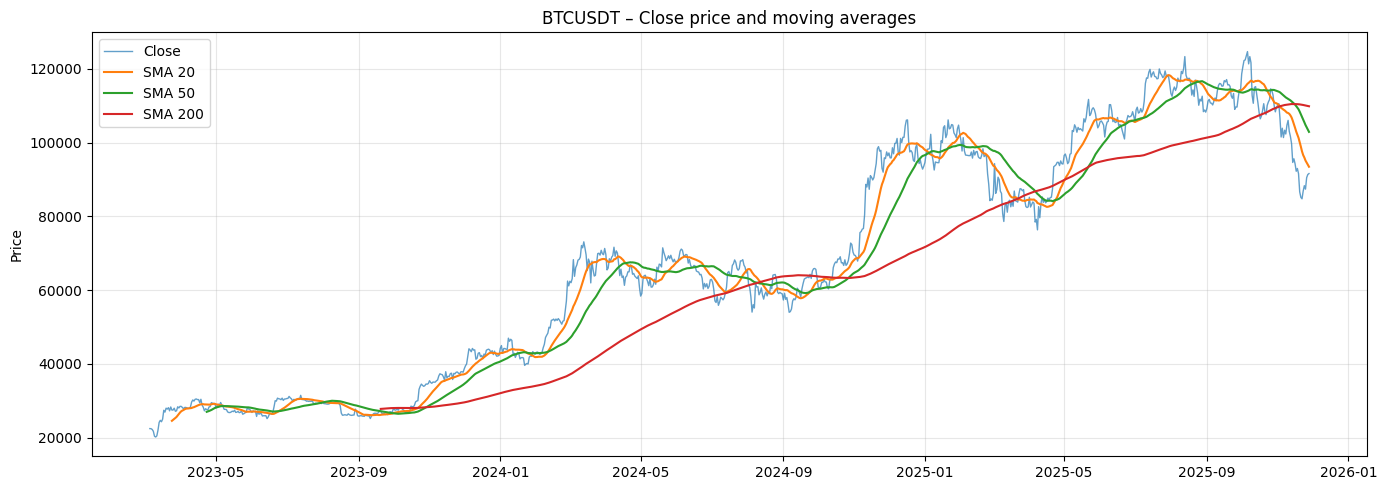

In [31]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'], label='Close', linewidth=1, alpha=0.7)
plt.plot(df.index, df['sma_20'], label='SMA 20', linewidth=1.5)
plt.plot(df.index, df['sma_50'], label='SMA 50', linewidth=1.5)
plt.plot(df.index, df['sma_200'], label='SMA 200', linewidth=1.5)
plt.title('BTCUSDT – Close price and moving averages')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- sma_20, sma_50 and sma_200 are simple moving averages over 20, 50 and 200 days, smoothing short-, medium- and long-term price moves.

- Crossings of shorter SMA above/below longer SMA highlight potential trend changes (e.g. bullish “golden cross” when 50 crosses above 200).

#### 2. Daily and 7-day returns

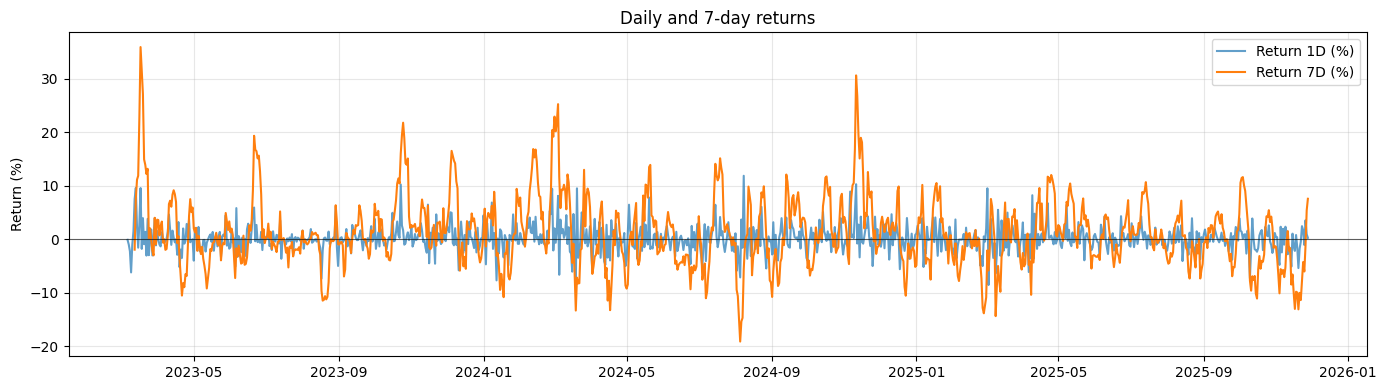

In [33]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['return_1d']*100, label='Return 1D (%)', alpha=0.7)
plt.plot(df.index, df['return_7d']*100, label='Return 7D (%)', linewidth=1.5)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.6)
plt.title('Daily and 7‑day returns')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- return_1d is the percentage change of the close price from one day to the next; return_7d compares today’s close to the close 7 days ago.

- Positive values indicate gains over the respective horizon, while negative values indicate losses, giving a direct measure of short-term performance and momentum.

#### 3. 20-day volatility

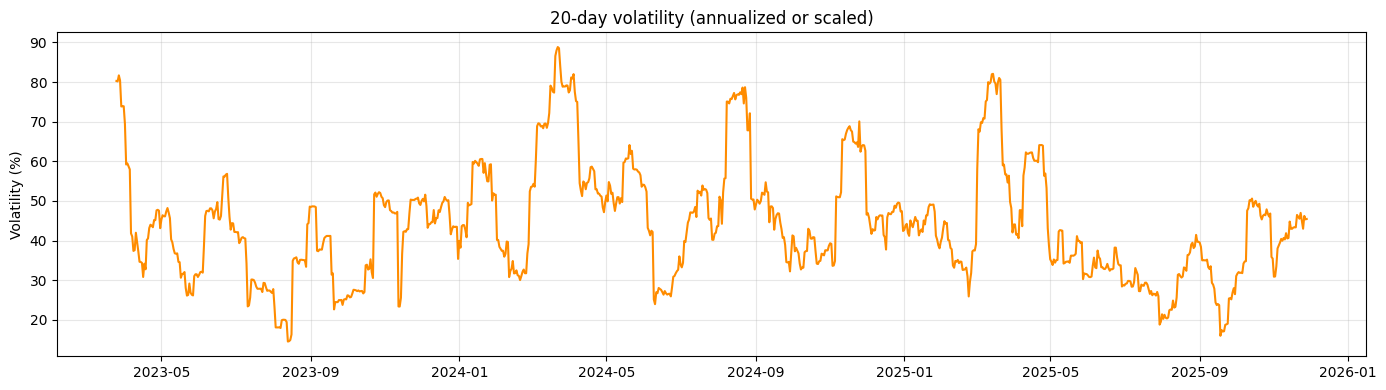

In [34]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['volatility_20d']*100, color='darkorange')
plt.title('20‑day volatility (annualized or scaled)')
plt.ylabel('Volatility (%)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- volatility_20d summarises the variability of daily returns over the last 20 days (often scaled to an annualized value).

- High volatility periods correspond to large price swings and higher risk, while low volatility indicates more stable price behaviour.

#### 4. RSI

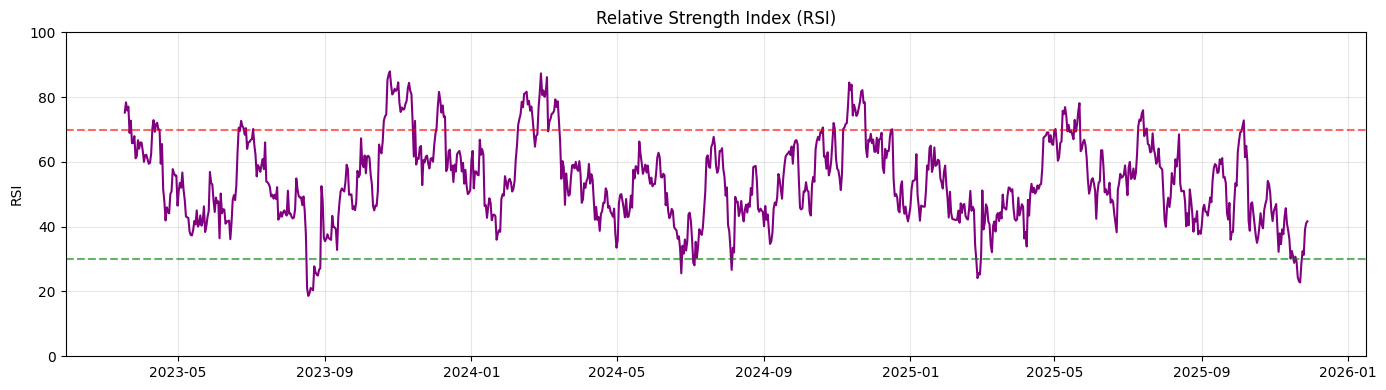

In [35]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['rsi'], color='purple', linewidth=1.5)
plt.axhline(70, color='red', linestyle='--', alpha=0.6)
plt.axhline(30, color='green', linestyle='--', alpha=0.6)
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- rsi measures the balance of recent gains vs losses on a 0–100 scale; values above 70 are typically interpreted as overbought and below 30 as oversold.

- RSI oscillations help characterise momentum: extended stays near extremes often precede mean‑reversions or trend slowdowns.

#### 5. MACD + signal + histogram

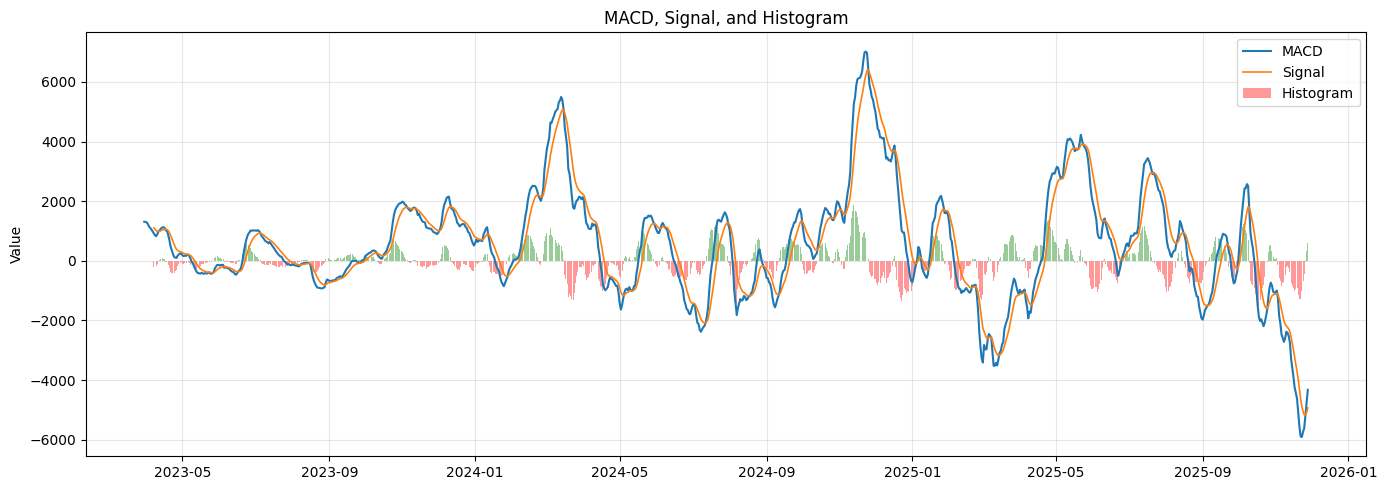

In [39]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['macd'], label='MACD', linewidth=1.5)
plt.plot(df.index, df['macd_signal'], label='Signal', linewidth=1.2)
plt.bar(df.index, df['macd_histogram'], label='Histogram',
        color=df['macd_histogram'].apply(lambda x: 'green' if x>=0 else 'red'),
        alpha=0.4)
plt.title('MACD, Signal, and Histogram')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- macd is the difference of two EMAs (fast–slow), and macd_signal is a smoothed version of MACD; their crossings mark potential momentum shifts.

- macd_histogram shows the distance between MACD and signal: positive bars indicate bullish momentum, negative bars bearish.

#### 6. Bollinger band width

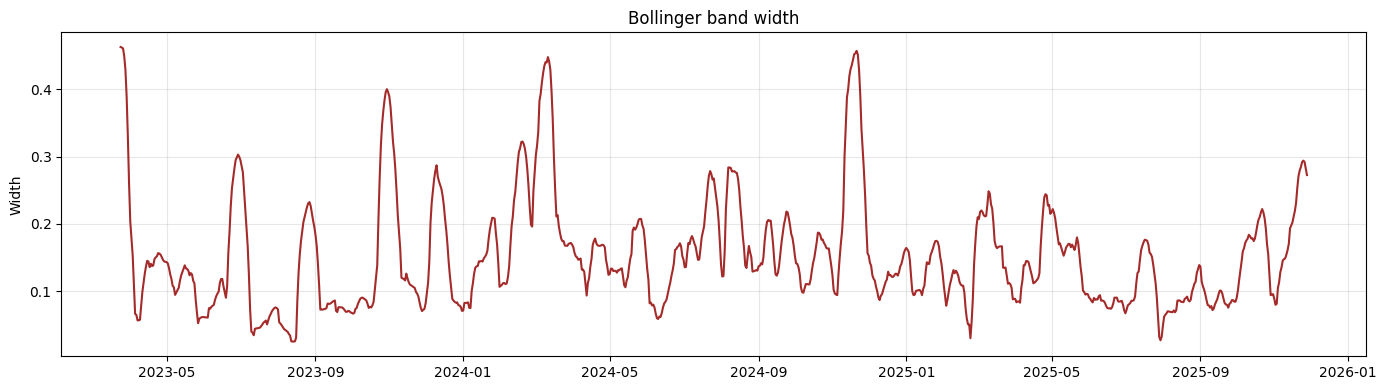

In [41]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['bb_width'], color='brown')
plt.title('Bollinger band width')
plt.ylabel('Width')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- bb_width represents the relative distance between the upper and lower Bollinger bands, effectively a volatility indicator derived from price.

- Narrow widths often correspond to volatility “squeezes” that can precede larger breakouts; wide widths reflect currently elevated volatility.

#### 7. Stochastic oscillator (%K and %D)

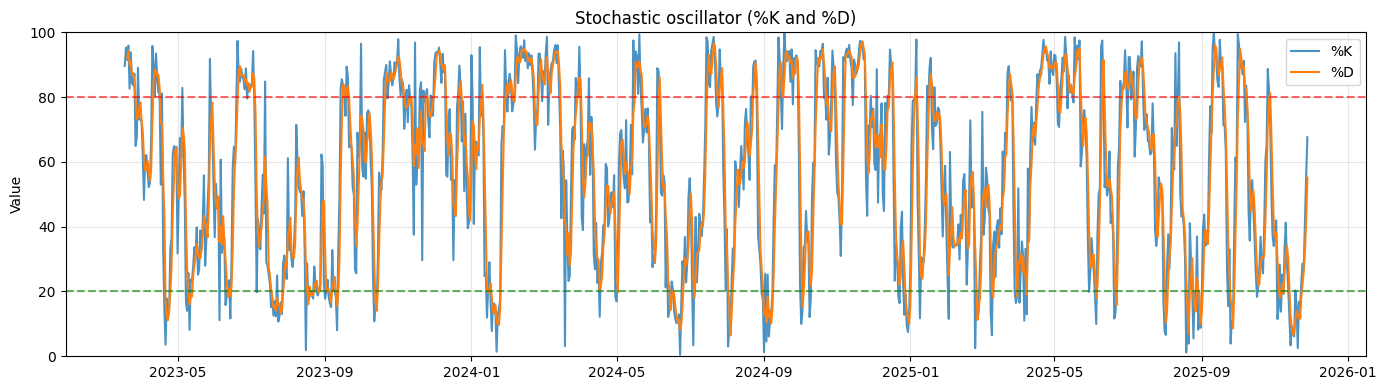

In [44]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['stoch_k'], label='%K', alpha=0.8)
plt.plot(df.index, df['stoch_d'], label='%D', linewidth=1.5)
plt.axhline(80, color='red', linestyle='--', alpha=0.6)
plt.axhline(20, color='green', linestyle='--', alpha=0.6)
plt.title('Stochastic oscillator (%K and %D)')
plt.ylabel('Value')
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- stoch_k (%K) measures the close relative to the recent high–low range, while stoch_d is a smoothed version of %K.

- Values above ~80 suggest an overbought range and below ~20 an oversold range; crossovers between %K and %D are used as timing signals.

#### 8. Recent 90‑day zoom (all key indicators)

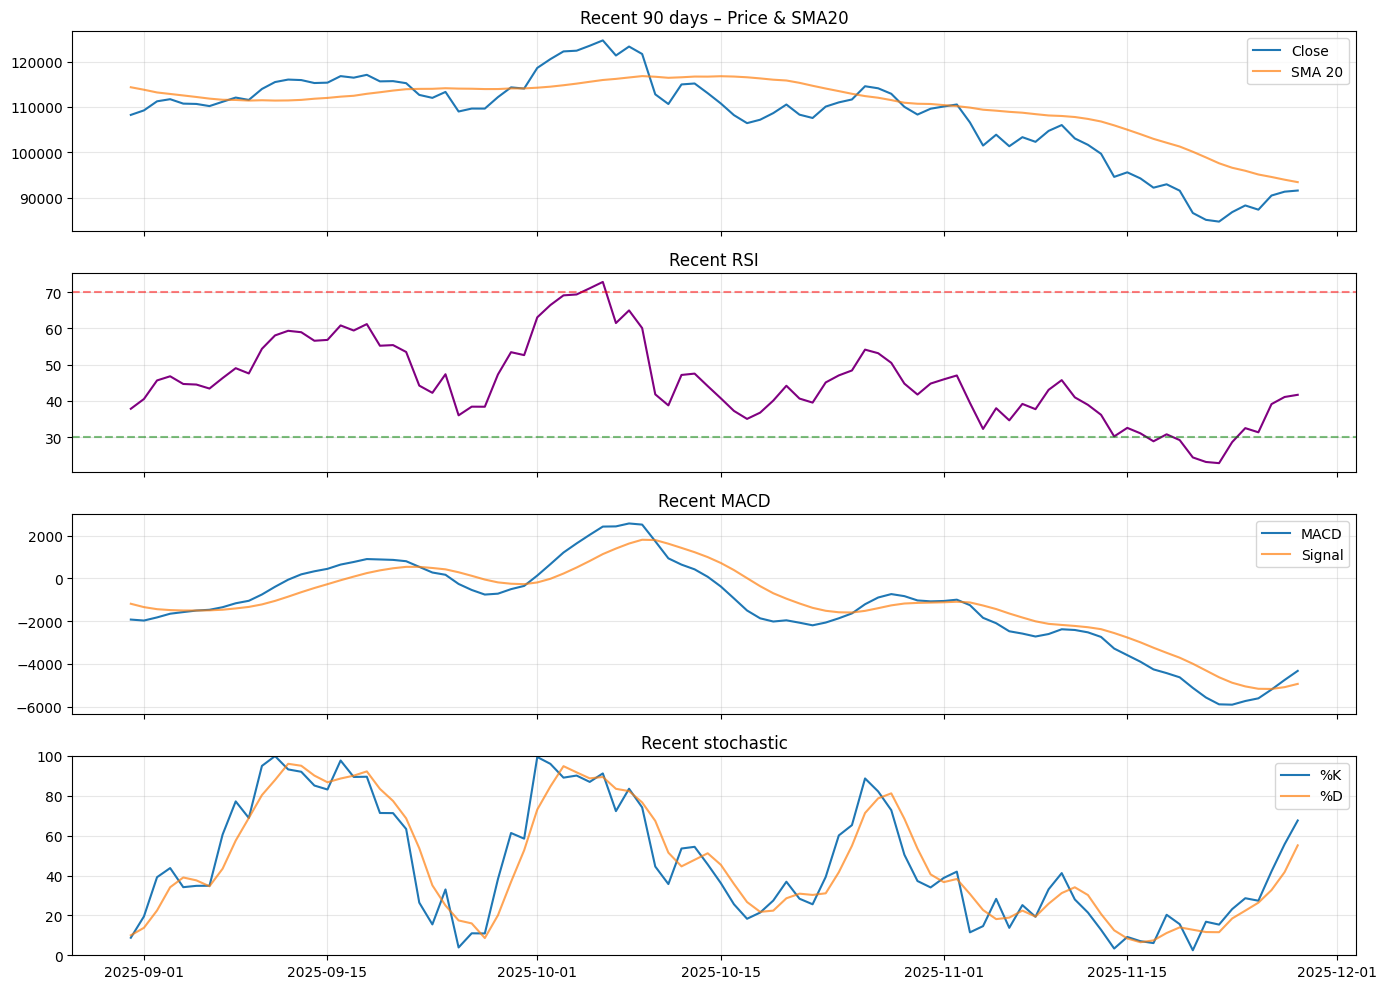

In [46]:
recent = df.tail(90)

fig, axes = plt.subplots(4, 1, figsize=(14,10), sharex=True)

axes[0].plot(recent.index, recent['close'], label='Close')
axes[0].plot(recent.index, recent['sma_20'], label='SMA 20', alpha=0.7)
axes[0].set_title('Recent 90 days – Price & SMA20')
axes[0].legend(); axes[0].grid(alpha=0.3)

axes[1].plot(recent.index, recent['rsi'], color='purple')
axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
axes[1].set_title('Recent RSI')
axes[1].grid(alpha=0.3)

axes[2].plot(recent.index, recent['macd'], label='MACD')
axes[2].plot(recent.index, recent['macd_signal'], label='Signal', alpha=0.7)
axes[2].set_title('Recent MACD')
axes[2].legend(); axes[2].grid(alpha=0.3)

axes[3].plot(recent.index, recent['stoch_k'], label='%K')
axes[3].plot(recent.index, recent['stoch_d'], label='%D', alpha=0.7)
axes[3].set_title('Recent stochastic'); axes[3].set_ylim(0,100)
axes[3].legend(); axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()


- This zoom ties the core indicators back to recent price action, making it easier to visually relate signals to actual moves.

- Looking at shorter windows is useful when debugging features or when validating that indicator behaviour matches expectations on concrete episodes.

#### 9. Correlation between engineered features

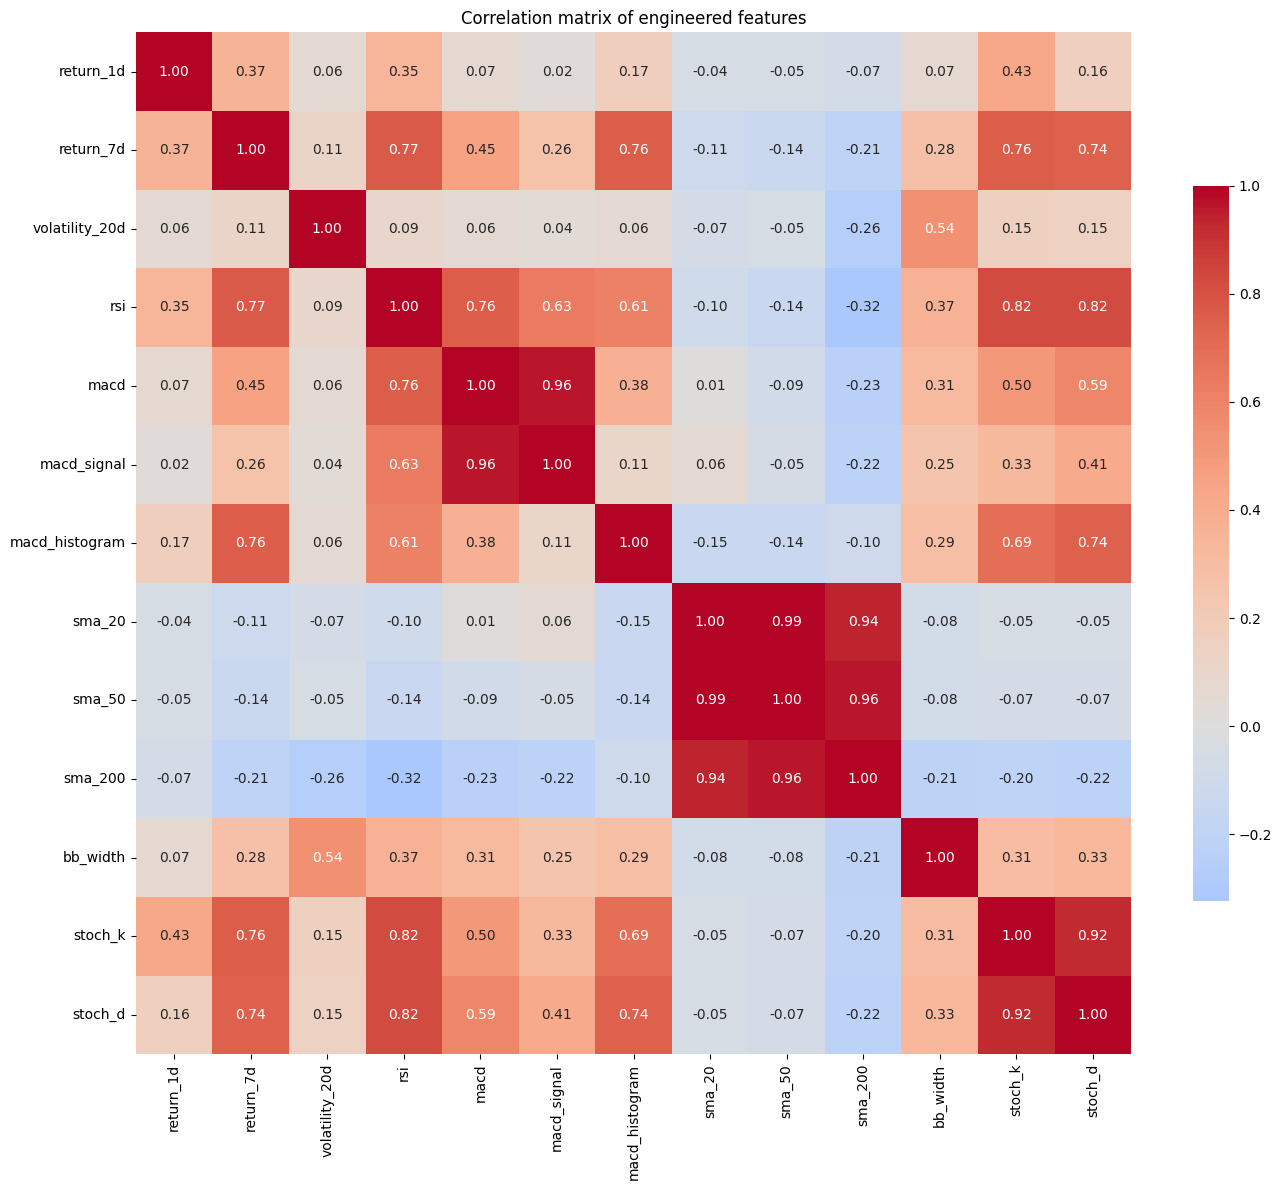

In [48]:
plt.figure(figsize=(14,12))
corr = df[feature_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            cbar_kws={'shrink':0.7})
plt.title('Correlation matrix of engineered features')
plt.tight_layout()
plt.show()


- The correlation heatmap shows linear dependencies between features, helping to detect redundancy (e.g. very similar signals) and strong relationships.

- Highly correlated inputs may be regularised, combined, or selectively removed depending on the downstream model and your feature selection strategy.

#### 10. Distribution: Daily return (return_1d)

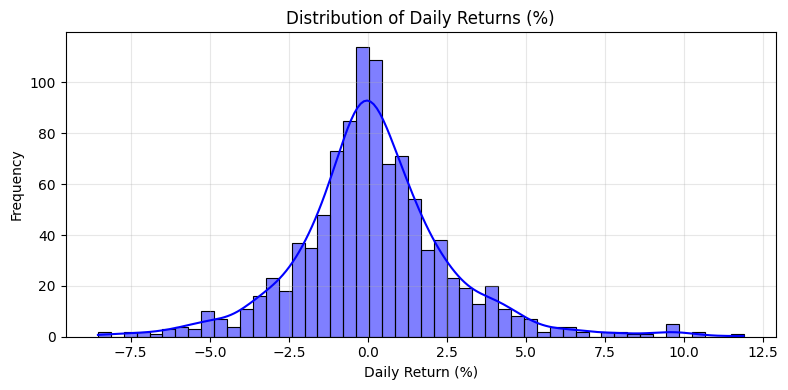

In [49]:
plt.figure(figsize=(8,4))
sns.histplot(df['return_1d'].dropna()*100, bins=50, kde=True, color='blue')
plt.title('Distribution of Daily Returns (%)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- The daily return distribution approximates a bell shape centered near zero, with some skewness and fat tails.

- Occasional extreme daily moves appear as outliers reflecting market shocks or volatility bursts.

#### 11. Distribution: 7-day return (return7d)

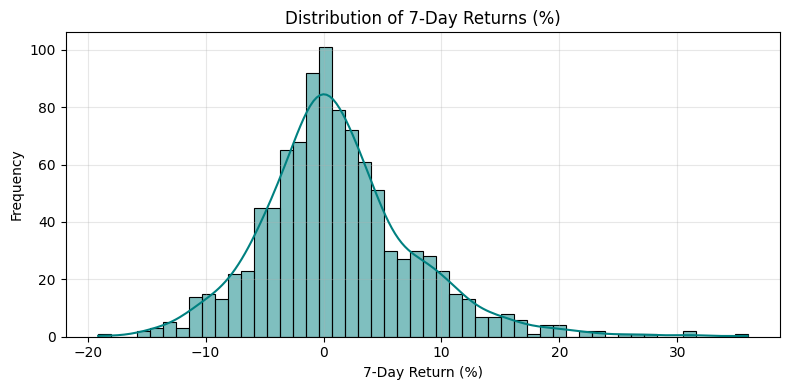

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(df['return_7d'].dropna()*100, bins=50, kde=True, color='teal')
plt.title('Distribution of 7-Day Returns (%)')
plt.xlabel('7-Day Return (%)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- The 7-day return aggregates returns over a week, showing a wider distribution with higher variance.

- Positive skew in this period can indicate bullish momentum, but occasional large negative returns also reflect downturns.

#### 12. Distribution: 20-day volatility (volatility20d)

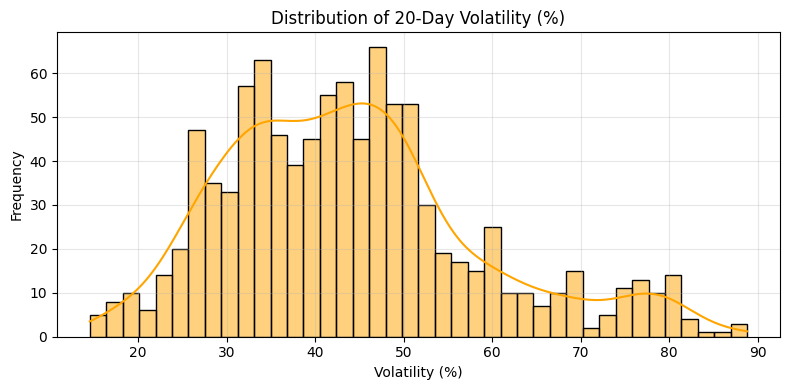

In [51]:
plt.figure(figsize=(8,4))
sns.histplot(df['volatility_20d'].dropna()*100, bins=40, kde=True, color='orange')
plt.title('Distribution of 20-Day Volatility (%)')
plt.xlabel('Volatility (%)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Volatility mostly ranges between moderate values, but has a long right tail representing rare periods of extreme price action or turbulence.

- This distribution highlights market calm punctuated by spikes of uncertainty or excitement.

#### 13. Distribution: RSI

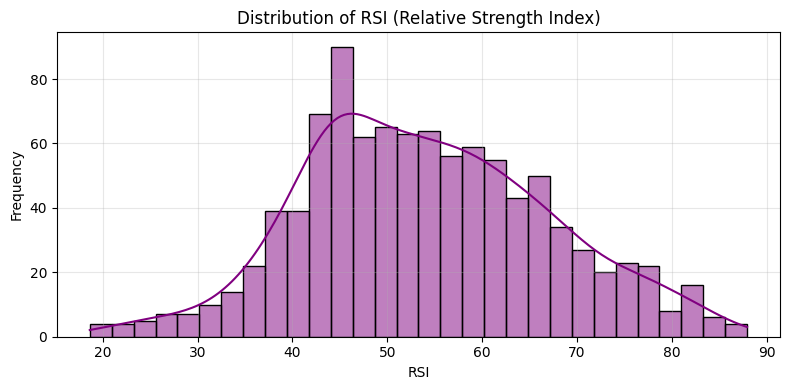

In [52]:
plt.figure(figsize=(8,4))
sns.histplot(df['rsi'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of RSI (Relative Strength Index)')
plt.xlabel('RSI')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- RSI values commonly cluster between 30 and 70, with fewer extreme overbought (>70) or oversold (<30) days.

- This reflects typical oscillation patterns where the market stays mostly in a neutral zone but sometimes reaches momentum extremes.

#### 14 Distribution: MACD

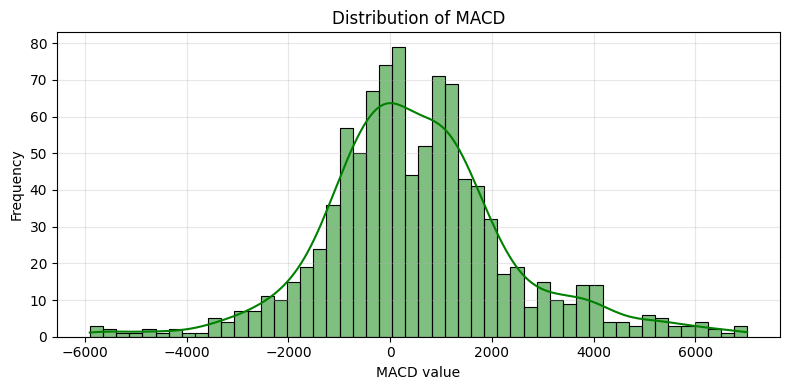

In [53]:
plt.figure(figsize=(8,4))
sns.histplot(df['macd'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of MACD')
plt.xlabel('MACD value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- MACD values oscillate around zero with a relatively symmetric distribution, indicating phases of momentum alternately favoring bulls or bears.

- Extreme values correspond to strong recent momentum shifts.

#### 15. Distribution: MACD Signal line

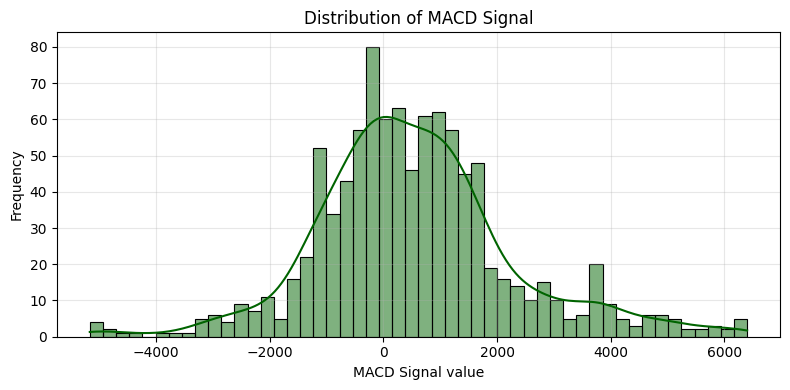

In [54]:
plt.figure(figsize=(8,4))
sns.histplot(df['macd_signal'].dropna(), bins=50, kde=True, color='darkgreen')
plt.title('Distribution of MACD Signal')
plt.xlabel('MACD Signal value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- The signal line smooths MACD, so the distribution is narrower but similarly centered near zero.

- It reacts slower than MACD and can be used to detect momentum trend changes.

#### 16. Distribution: MACD Histogram

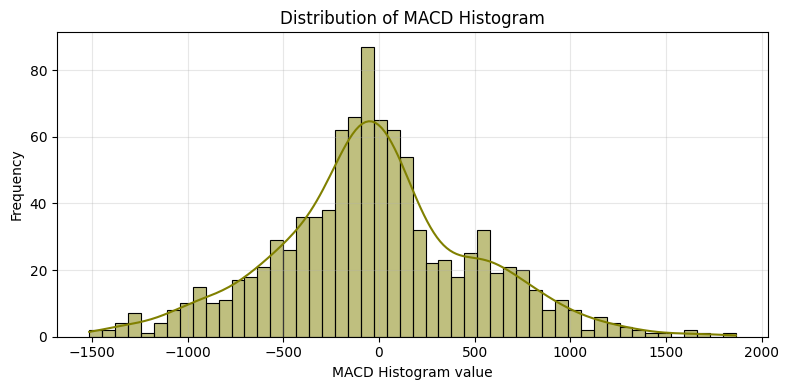

In [55]:
plt.figure(figsize=(8,4))
sns.histplot(df['macd_histogram'].dropna(), bins=50, kde=True, color='olive')
plt.title('Distribution of MACD Histogram')
plt.xlabel('MACD Histogram value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- The histogram reflects distance between MACD and signal, showing peaks near zero but with fat tails.

- Larger magnitude bars indicate stronger momentum divergence or convergence.

#### 17. Distribution: Bollinger Band Width (bbwidth)

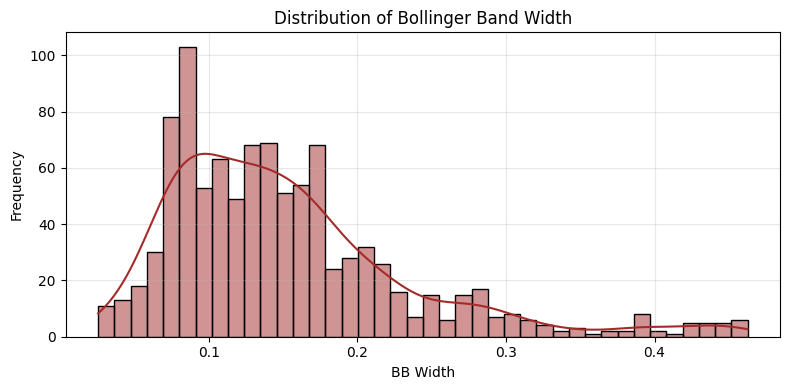

In [56]:
plt.figure(figsize=(8,4))
sns.histplot(df['bb_width'].dropna(), bins=40, kde=True, color='brown')
plt.title('Distribution of Bollinger Band Width')
plt.xlabel('BB Width')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Bollinger band width is usually low to moderate, indicating typical volatility, but with occasional high values representing expanded price ranges.

- Narrow widths suggest volatility contractions, often preceding price breakouts.

#### 19. Distribution: Stochastic %D

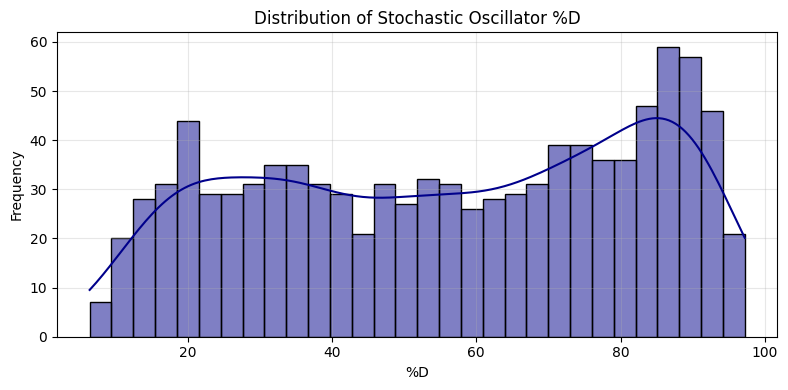

In [57]:
plt.figure(figsize=(8,4))
sns.histplot(df['stoch_d'].dropna(), bins=30, kde=True, color='darkblue')
plt.title('Distribution of Stochastic Oscillator %D')
plt.xlabel('%D')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- %D smooths %K and displays a similar distribution but with reduced noise.

- Useful in identifying stochastics crossovers as timing signals.